In [98]:
import adi
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [99]:
sdr = adi.ad9361("ip:192.168.2.5")
samp_rate = 6e6
Fc = 344e6
Nsamp = 8192
NFFT = 1024

sdr.rx_enabled_channels = [0, 1]
sdr.sample_rate = int(samp_rate)
sdr.rx_rf_bandwidth = int(samp_rate)
sdr.rx_lo = int(Fc)
sdr.rx_buffer_size = Nsamp
sdr.gain_control_mode_chan0 = "manual"
sdr.gain_control_mode_chan1 = "manual"
sdr.rx_hardwaregain_chan0 = int(40)
sdr.rx_hardwaregain_chan1 = int(40)
samples = sdr.rx() # Dummy rx

auto11 = np.zeros(NFFT, dtype=np.complex64)
auto22 = np.zeros(NFFT, dtype=np.complex64)
cross12 = np.zeros(NFFT, dtype=np.complex64)

Naver = 1024

for i in range(Naver):
    x = sdr.rx()
    a = x[0][:]
    b = x[1][:]
    for j in range(int(Nsamp/NFFT)):
        c1_fft = np.fft.fft(a[j*NFFT:(j+1)*NFFT])
        c2_fft = np.fft.fft(b[j*NFFT:(j+1)*NFFT])
        auto11 = auto11 + c1_fft*np.conj(c1_fft)
        auto22 = auto22 + c2_fft*np.conj(c2_fft)
        cross12 = cross12 + c1_fft*np.conj(c2_fft)

Nnorm = Naver*int(Nsamp/NFFT)

auto11 = np.fft.fftshift(auto11/Nnorm)
auto22 = np.fft.fftshift(auto22/Nnorm)
cross12 = np.fft.fftshift(cross12/Nnorm)

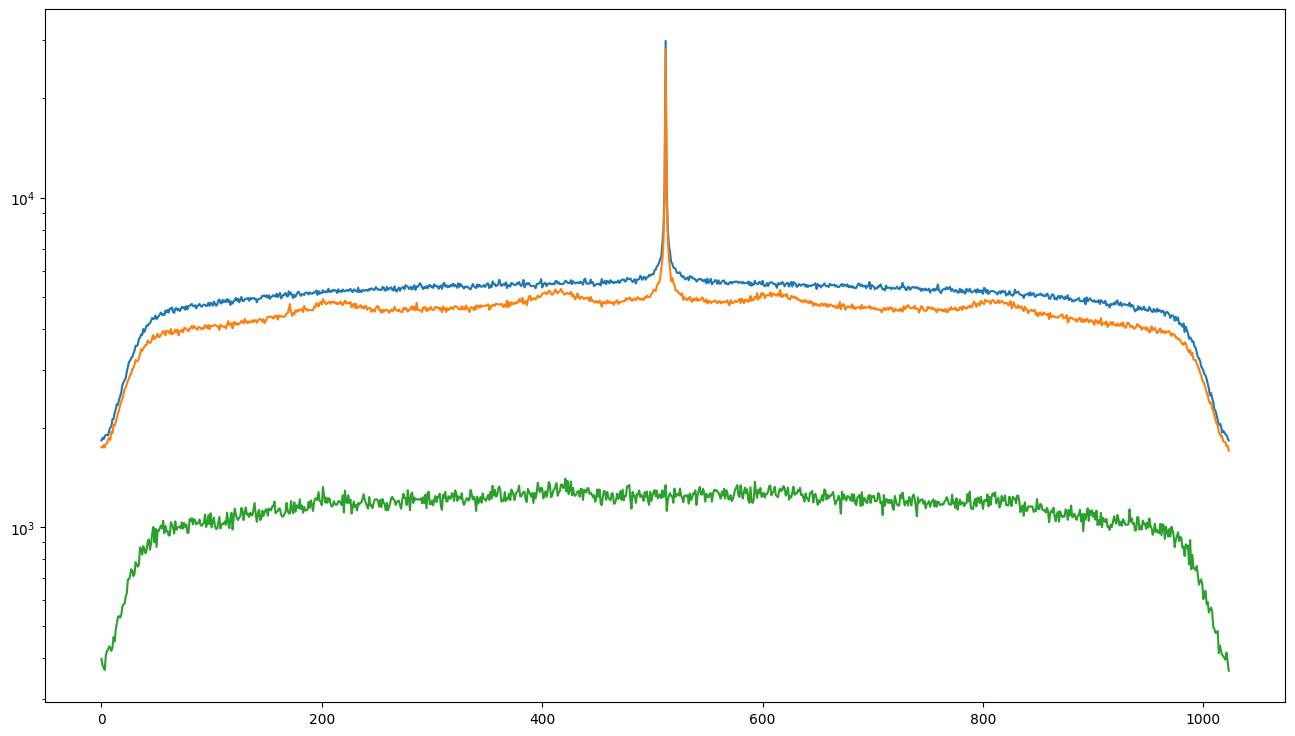

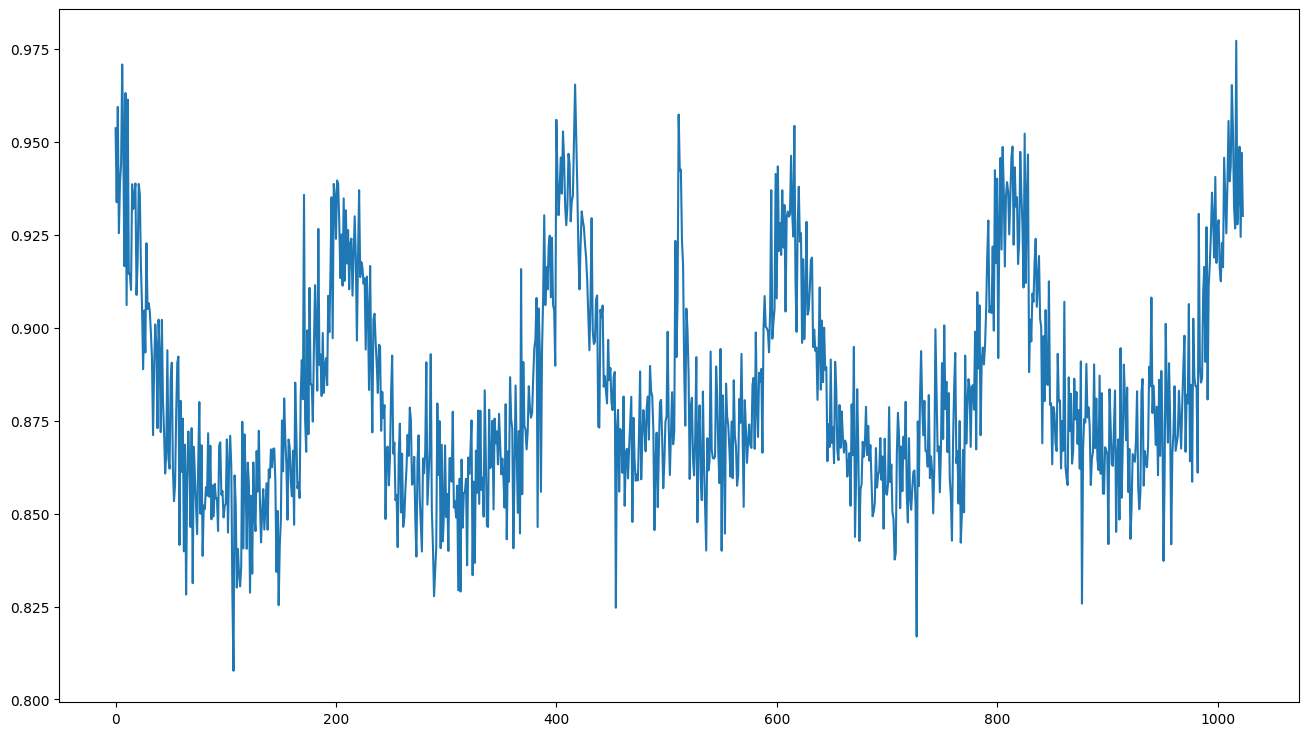

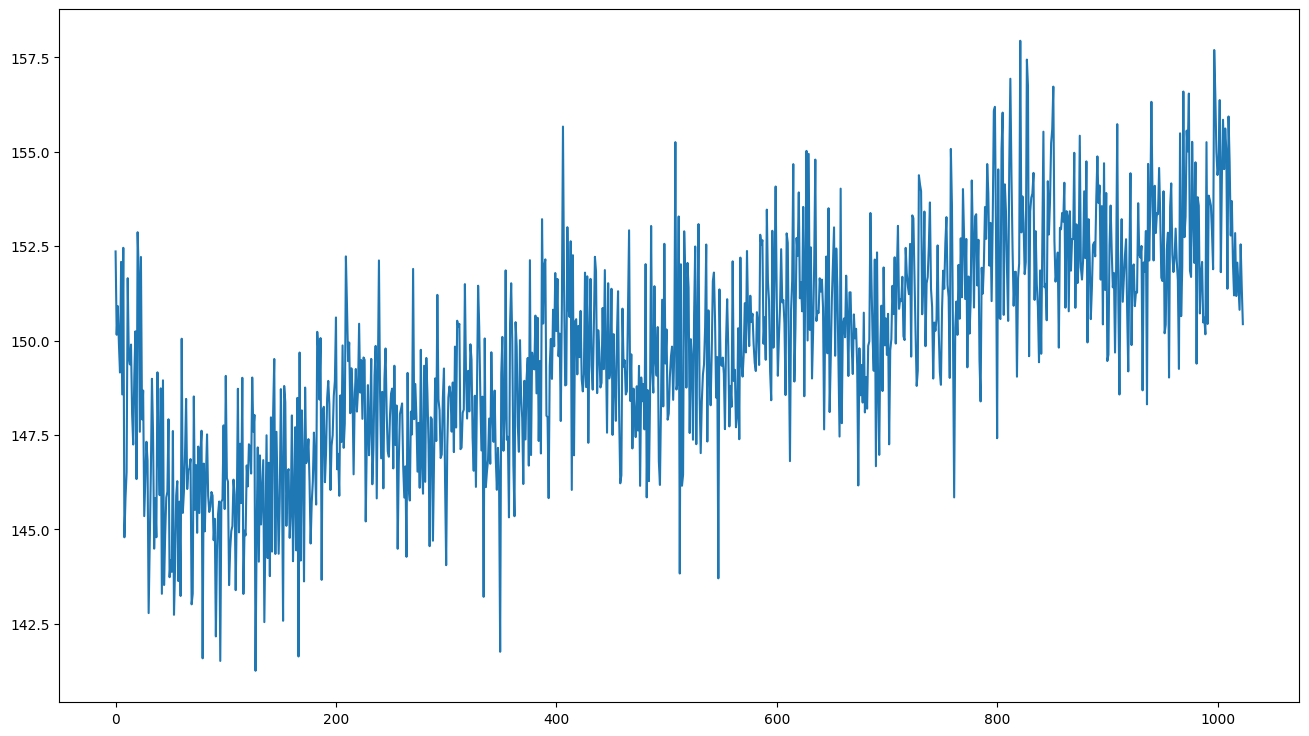

In [100]:
plt.figure(figsize=(16,9))
plt.semilogy(np.abs(auto11))
plt.semilogy(np.abs(auto22))
plt.semilogy(np.abs(cross12))

plt.figure(figsize=(16,9))
plt.plot(np.abs(auto22)/np.abs(auto11))

plt.figure(figsize=(16,9))
plt.plot(180*np.unwrap(np.angle(cross12))/np.pi)